  # Loading Data Part 2

  This example continues from the previous example, so if you haven't already
  done so, please go through the previous example first.

 This example covers data in 2 dimensions, such as a size distributions.


  ## Working path

  Set the working path where the data is stored. For now we'll use the
  provided example data in this current directory.

  But the path could be any where on your computer. For example, if you have a
  folder called "data" in your home directory, you could set the path to:
  `path = "U:\\data\\processing\\Campgain2023_of_aswsome\\data"`

In [1]:
# all the imports, but we'll go through them one by one as we use them
import os
import numpy as np
import matplotlib.pyplot as plt
from particula.data import loader, loader_interface, settings_generator
from particula.data.tests.example_data.get_example_data import get_data_folder

In [1]:
# set the parent directory of the data folder, for now this is the same as the
# current working directory, but this can be a completely different path
#
# imports os to get the current working directory
import os
from particula.data.tests.example_data.get_example_data import get_data_folder

current_path = os.getcwd()
print('Current path for this script:')
# print the path from particula/ onwards
print(current_path.rsplit('particula')[-1])

path = get_data_folder()
print('Path to data folder:')
print(path.rsplit('particula')[-1])

Current path for this script:
\docs\examples
Path to data folder:
\data\tests\example_data


 # Load the data

  With the working directory set, we can now load the data. For this we use
  the `loader` module and call loader.data_raw_loader() with the file path as
  argument.

In [12]:
data_file = os.path.join(
    path,
    'SMPS_data',
    '2022-07-07_095151_SMPS.csv')

# print the file path
# print(data_file)

# load the data
raw_data = loader.data_raw_loader(data_file)

# print the interesting bits
for row in raw_data[22:30]:
    print(row)

Units,dW/dlogDp
Weight,Number
Sample #,Date,Start Time,Sample Temp (C),Sample Pressure (kPa),Relative Humidity (%),Mean Free Path (m),Gas Viscosity (Pa*s),Diameter Midpoint (nm),20.72,21.10,21.48,21.87,22.27,22.67,23.08,23.50,23.93,24.36,24.80,25.25,25.71,26.18,26.66,27.14,27.63,28.13,28.64,29.16,29.69,30.23,30.78,31.34,31.91,32.49,33.08,33.68,34.29,34.91,35.55,36.19,36.85,37.52,38.20,38.89,39.60,40.32,41.05,41.79,42.55,43.32,44.11,44.91,45.73,46.56,47.40,48.26,49.14,50.03,50.94,51.86,52.80,53.76,54.74,55.73,56.74,57.77,58.82,59.89,60.98,62.08,63.21,64.36,65.52,66.71,67.93,69.16,70.41,71.69,72.99,74.32,75.67,77.04,78.44,79.86,81.31,82.79,84.29,85.82,87.38,88.96,90.58,92.22,93.90,95.60,97.34,99.10,100.90,102.74,104.60,106.50,108.43,110.40,112.40,114.44,116.52,118.64,120.79,122.98,125.21,127.49,129.80,132.16,134.56,137.00,139.49,142.02,144.60,147.22,149.89,152.61,155.38,158.20,161.08,164.00,166.98,170.01,173.09,176.24,179.43,182.69,186.01,189.38,192.82,196.32,199.89,203.51,207.21,210.97,

 # Now to format the data

 This is a little more complicated than the 1d data, because we have to
 pull out the sizes bins, and read them in as our headers. This is done by
 specifiying the start and end keywords for the size bins. In this case
 the start keyword is "Date Time" and the end keyword is "Total Conc".

In [4]:
# This is done by the general_data_formatter function for timeseries data
# 2d data is a separate function

epoch_time, data, header = loader.sizer_data_formatter(
    data=raw_data,
    data_checks={
        "characters": [250],
        "skip_rows": 25,
        "skip_end": 0,
        "char_counts": {"/": 2, ":": 2}
    },
    data_sizer_reader={
        'Dp_start_keyword': 'Diameter Midpoint (nm)',
         'Dp_end_keyword': 'Scan Time (s)',
         'convert_scale_from': 'dw/dlogdp'
    },
    time_column=[1, 2],
    time_format="%m/%d/%Y %H:%M:%S",
    delimiter=",",
    header_row=24)

# print the first bit of the data
print('Epoch time:')
print(epoch_time[:5])
print('Data shape:')
print(data.shape)
print('Header:')
print(header[:10])

Epoch time:
[1.65718376e+09 1.65718385e+09 1.65718394e+09 1.65718403e+09
 1.65718412e+09]
Data shape:
(2854, 203)
Header:
['20.72', '21.10', '21.48', '21.87', '22.27', '22.67', '23.08', '23.50', '23.93', '24.36']


  ## Pause to Plot

 Now that we have the data and time, we can plot it to see what it looks
 like.

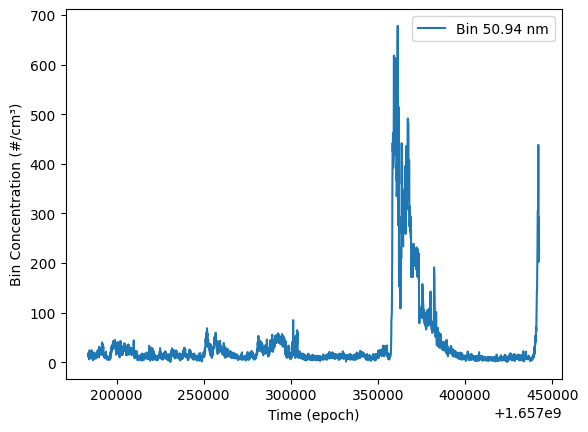

In [5]:
# plot the data
fig, ax = plt.subplots()
ax.plot(epoch_time,
        data[:, 50],
        label=f'Bin {header[50]} nm',
)
ax.set_xlabel("Time (epoch)")
ax.set_ylabel("Bin Concentration (#/cm³)")
ax.legend()
plt.show()
fig.tight_layout()

## Dates in Plots

If you want dates on the x-axis, you need to convert the dates to
matplotlib dates, or use np.datetime64. This is done in the `convert.datetime64_from_epoch_array` function.

Then it is usually best to rotate the x-axis labels so they don't overlap.
This is done with the `plt.xticks(rotation=45)` function.

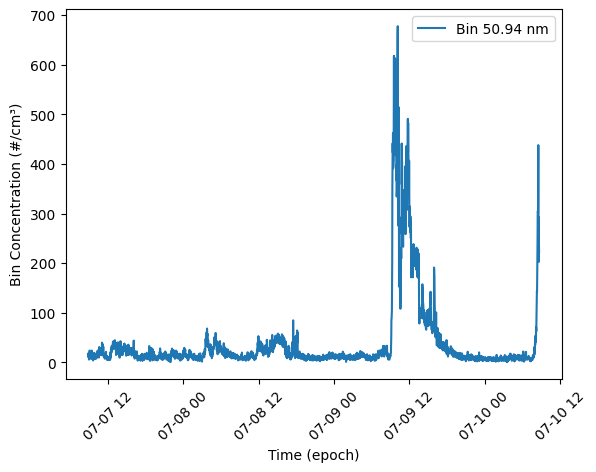

In [15]:
from particula.util.convert import datetime64_from_epoch_array

# convert the epoch time to datetime64
time_in_datetime64 = datetime64_from_epoch_array(epoch_time)

# plot the data
fig, ax = plt.subplots()
ax.plot(time_in_datetime64,
        data[:, 50],
        label=f'Bin {header[50]} nm',
        )
plt.xticks(rotation=45)
ax.set_xlabel("Time (epoch)")
ax.set_ylabel("Bin Concentration (#/cm³)")
ax.legend()
plt.show()
fig.tight_layout()

 ## Contour plot of data

 We can also plot the data as a contour plot, which is useful for seeing
 how the data changes over time.

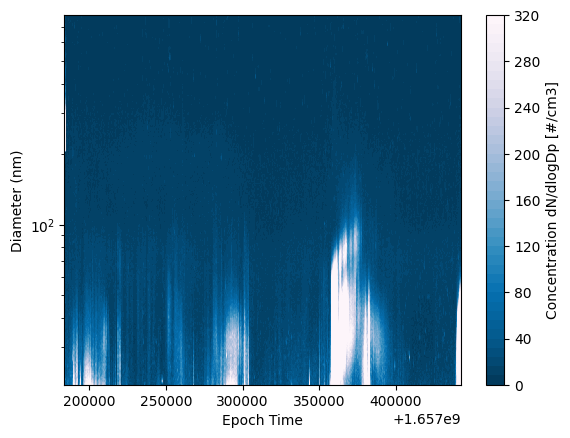

In [16]:
# settin limits helps to see the data better, you can also use np.log10()
# to plot the concentration in log space
concentration = data
concentration = np.where(concentration < 1e-5, 1e-5, concentration)
concentration = np.where(concentration > 10**2.5, 10**2.5, concentration)
# concentration = np.log10(concentration)

fig, ax = plt.subplots(1, 1)
plt.contourf(
    epoch_time,
    np.array(header).astype(float),
    concentration.T,
    cmap=plt.cm.PuBu_r, levels=50)
plt.yscale('log')
ax.set_xlabel('Epoch Time')
ax.set_ylabel('Diameter (nm)')
plt.colorbar(label='Concentration dN/dlogDp [#/cm3]', ax=ax)
plt.show()
fig.tight_layout()

  ## Settings Generator for 1d and 2d data

 Just like with the 1d data, we can use the settings generator to generate
 the settings dictionary for importing the data. This is done by calling the
 `settings_generator.for_general_sizer_1d_2d_load()` function.

 This function has a lot of arguments, but remember, if you just want the
 default settings, you don't need to pass any arguments. The defaults are
 set to the example data provided.

In [17]:
# Settings to load 1d and 2d data from the sizer or any other instrument
# that has a 1d and 2d data in the same file.

settings_1d, settings_2d = settings_generator.for_general_sizer_1d_2d_load(
    relative_data_folder='SMPS_data',
    filename_regex='*.csv',
    file_min_size_bytes=10,
    header_row=24,
    data_checks={
        "characters": [250],
        "skip_rows": 25,
        "skip_end": 0,
        "char_counts": {"/": 2, ":": 2}
    },
    data_1d_column=[
        "Lower Size (nm)",
        "Upper Size (nm)",
        "Sample Temp (C)",
        "Sample Pressure (kPa)",
        "Relative Humidity (%)",
        "Median (nm)",
        "Mean (nm)",
        "Geo. Mean (nm)",
        "Mode (nm)",
        "Geo. Std. Dev.",
        "Total Conc. (#/cm³)"],
    data_1d_header=[
        "Lower_Size_(nm)",
        "Upper_Size_(nm)",
        "Sample_Temp_(C)",
        "Sample_Pressure_(kPa)",
        "Relative_Humidity_(%)",
        "Median_(nm)",
        "Mean_(nm)",
        "Geo_Mean_(nm)",
        "Mode_(nm)",
        "Geo_Std_Dev.",
        "Total_Conc_(#/cc)"],
    data_2d_dp_start_keyword="Diameter Midpoint (nm)",
    data_2d_dp_end_keyword="Scan Time (s)",
    data_2d_convert_concentration_from="dw/dlogdp",
    time_column=[1, 2],
    time_format="%m/%d/%Y %H:%M:%S",
    delimiter=",",
    time_shift_seconds=0,
    timezone_identifier="UTC",
)

# print and format the settings dictionary
print('Settings 1d data dictionary:')
for key, value in settings_1d.items():
    print(f'{key}: {value}')

print('')
print('Settings 2d data dictionary:')
for key, value in settings_2d.items():
    print(f'{key}: {value}')

Settings 1d data dictionary:
relative_data_folder: SMPS_data
filename_regex: *.csv
MIN_SIZE_BYTES: 10
data_loading_function: general_1d_load
header_row: 24
data_checks: {'characters': [250], 'skip_rows': 25, 'skip_end': 0, 'char_counts': {'/': 2, ':': 2}}
data_column: ['Lower Size (nm)', 'Upper Size (nm)', 'Sample Temp (C)', 'Sample Pressure (kPa)', 'Relative Humidity (%)', 'Median (nm)', 'Mean (nm)', 'Geo. Mean (nm)', 'Mode (nm)', 'Geo. Std. Dev.', 'Total Conc. (#/cm³)']
data_header: ['Lower_Size_(nm)', 'Upper_Size_(nm)', 'Sample_Temp_(C)', 'Sample_Pressure_(kPa)', 'Relative_Humidity_(%)', 'Median_(nm)', 'Mean_(nm)', 'Geo_Mean_(nm)', 'Mode_(nm)', 'Geo_Std_Dev.', 'Total_Conc_(#/cc)']
time_column: [1, 2]
time_format: %m/%d/%Y %H:%M:%S
delimiter: ,
time_shift_seconds: 0
timezone_identifier: UTC

Settings 2d data dictionary:
relative_data_folder: SMPS_data
filename_regex: *.csv
MIN_SIZE_BYTES: 10
data_loading_function: general_2d_load
header_row: 24
data_checks: {'characters': [250], 'ski

  ## Load the data with the interface

  Now that we have the settings dictionary, we can use an interface
  that will take the settings and locations and do all those steps from above.
  Calling the relevant functions.

In [18]:
# import the interface

working_path = get_data_folder()

# settings from above

# no call the loader interface
data_stream_1d = loader_interface.load_files_interface(
    path=working_path,
    settings=settings_1d,
)

data_stream_2d = loader_interface.load_files_interface(
    path=working_path,
    settings=settings_2d,
)

Loading data from: 2022-07-07_095151_SMPS.csv
Loading data from: 2022-07-10_094659_SMPS.csv
Loading data from: 2022-07-07_095151_SMPS.csv
Loading data from: 2022-07-10_094659_SMPS.csv


In [19]:
# print data stream summary

print('')
print('Data stream 1d summary:')
print(data_stream_1d)

print('')
print('Data stream 2d summary:')
print(data_stream_2d)


Data stream 1d summary:
Stream(header=['Lower_Size_(nm)', 'Upper_Size_(nm)', 'Sample_Temp_(C)', 'Sample_Pressure_(kPa)', 'Relative_Humidity_(%)', 'Median_(nm)', 'Mean_(nm)', 'Geo_Mean_(nm)', 'Mode_(nm)', 'Geo_Std_Dev.', 'Total_Conc_(#/cc)'], data=array([[2.05000e+01, 2.05000e+01, 2.05000e+01, ..., 2.05000e+01,
        2.05000e+01, 2.05000e+01],
       [7.91500e+02, 7.91500e+02, 7.91500e+02, ..., 7.91500e+02,
        7.91500e+02, 7.91500e+02],
       [2.37000e+01, 2.36000e+01, 2.37000e+01, ..., 2.35000e+01,
        2.33000e+01, 2.35000e+01],
       ...,
       [2.07210e+01, 2.52550e+01, 2.18700e+01, ..., 2.07210e+01,
        2.10970e+01, 2.07210e+01],
       [2.17900e+00, 2.10100e+00, 2.13600e+00, ..., 2.31800e+00,
        2.31800e+00, 2.24800e+00],
       [2.16900e+03, 2.39408e+03, 2.27861e+03, ..., 2.08056e+03,
        2.10616e+03, 2.45781e+03]]), time=array([1.65718376e+09, 1.65718385e+09, 1.65718394e+09, ...,
       1.65753440e+09, 1.65753450e+09, 1.65753459e+09]), files=[['2022-07

In [20]:
#  about it.
print(help(data_stream_2d))

Help on Stream in module particula.data.stream object:

class Stream(builtins.object)
 |  Stream(header: List[str] = <factory>, data: numpy.ndarray = <factory>, time: numpy.ndarray = <factory>, files: List[str] = <factory>) -> None
 |  
 |  A class for consistent data storage and format.
 |  
 |  Attributes:
 |  ---------
 |  header : List[str]
 |      A list of strings representing the header of the data stream.
 |  data : np.ndarray
 |      A numpy array representing the data stream.
 |  time : np.ndarray
 |      A numpy array representing the time stream.
 |  files : List[str]
 |      A list of strings representing the files containing the data stream.
 |  
 |  Methods:
 |  -------
 |  validate_inputs
 |      Validates the inputs to the Stream class.
 |  datetime64 -> np.ndarray
 |      Returns an array of datetime64 objects representing the time stream.
 |      Useful for plotting, with matplotlib.dates.
 |  return_header_dict -> dict
 |      Returns the header as a dictionary with

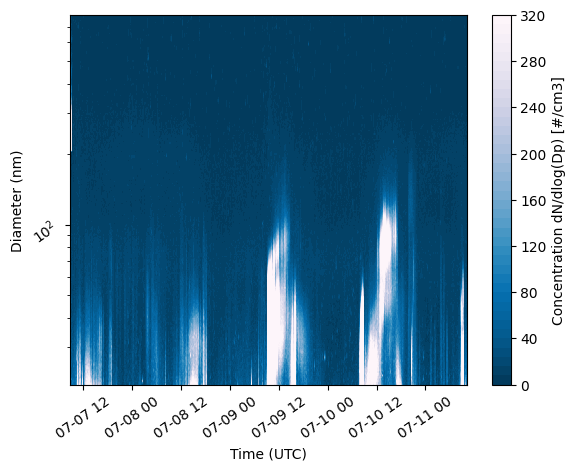

In [22]:
# settin limits helps to see the data better, you can also use np.log10()
# to plot the concentration in log space
concentration = data_stream_2d.data
concentration = np.where(concentration < 1e-5, 1e-5, concentration)
concentration = np.where(concentration > 10**2.5, 10**2.5, concentration)
# concentration = np.log10(concentration)

fig, ax = plt.subplots(1, 1)
plt.contourf(
    data_stream_2d.datetime64,
    np.array(data_stream_2d.header).astype(float),
    concentration,
    cmap=plt.cm.PuBu_r, levels=50)
plt.yscale('log')
plt.tick_params(rotation=35)  # rotate the x axis labels
ax.set_xlabel("Time (UTC)")
ax.set_ylabel('Diameter (nm)')
plt.colorbar(label='Concentration dN/dlog(Dp) [#/cm3]', ax=ax)
plt.show()
fig.tight_layout()

  ## Summary

  This example covered loading data from a file that has 2 dimensions, such
  as a size distribution. It covered the following:

  - Setting the working path
  - Loading the data
  - Formatting the data
  - Plotting the data
  - Generating the settings dictionary
  - Loading the data with the interface
  - Plotting the data stream